# Introduction to network graphs

This notebook is the first in a series of notebooks designed to provide you with a hands-on learning of the fundamental graph algorithms used in networking. 

This notebook is titled as Graph Primer as we would be introducing the notion of why networks are represented through graphs and a few fundamental properties of the graph which we would be using in the subsequent notebooks.

Let us start with a **definition for a network**.
Networks refer to the arrangement through which two or more computing devices can communicate with each other. The arrangement for communication can be through different media like wired, wireless connections or through visible light. 

## What is a network graph?
Network graphs are representations of physical networks where the nodes represent the networking devices and the edges represent the links of the network. Network graphs are weighted graphs as in, the edge contain a weight which relates to link properties like latency, link speed, distance and network graphs can also be either directed or undirected graphs. 

## What is a network topology?

Network topology refers to specific arrangements of the nodes and links on the network. Network topologies are generally used to study the behavior of the network while data sharing (or) communication, failures (or) fault, etc.


## Fetching the packages for running examples

We shall import the python packages used in this series of notebooks.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

## Building the graph

Let us built an example weighted, undirected graph. You are free to convert this as a directed graph by setting the `directed=False` as `directed=True` as well as change the weights for the edges by replacing the `weight` value in an edge addition statement which is expressed as `graphs.add_Edge(node1, node2, weight)`

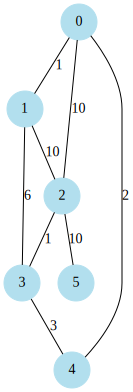

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)

graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "first-graph")

## Representating a network as graph

While this is a slight deviation from the actual topic of implementing Dijkstra's Algorithm, it is important to describe the two ways of representing a graph on paper (or) code namely the **Adjacency List** and **Adjacency Matrix**. This section will not be a detailed explanation about these representations but the purpose is to introduce how graph representations can help in implementing graph-based algorithms. In case you are interested in reading more about the graph representations check out [0_graphs and graph_representations](#).


**Adjacency Matrix** in a nutshell is a ($n * n$) square matrix which indicates if two vertices are connected by an edge or not. Adjacency matrices are used since they are intutive and helps to visualize the graphs. However, as the graphs get bigger the runtime of using an adjacency matrix increases, more information can be found on the [running_time section](#).

The following is the adjacency matrix representation for the graph considered as an example. In this matrix, each row and column represents one node. For example row "1" and column "1" will be associated with Node "1" (or `b (in code)`) in the visualized graph above. Each element in this matrix represents an edge, which is either denoted as (0,1) for an unweighted graph or with a value which corresponds to the weight of the edge. In our graph, for Node 1, we have three edges namely:
1. (1,0) -> 1   `in code they correspond to graphs,connect(a,b,1)`
2. (1,2) -> 10  `in code they correspond to graphs,connect(b,c,10)`
3. (1,3) -> 6   `in code they correspond to graphs,connect(b,d,6)`

In our example, since the graph is undirected, we notice that the adjacency matrix as well its trasponse are symmetrcical, which indicates the connections are bidirectional. The bidirectional nature of the edge can be observed in the matrix where the statement `graphs,connect(a,b,1)` has the edge presence for both (0,1) -> 1 and (1,0) -> 1 cases on the adjacency matrix.

In [3]:
graphs.get_adjMatrix()

[[0, 1, 10, 0, 2, 0],
 [1, 0, 10, 6, 0, 0],
 [10, 10, 0, 1, 0, 10],
 [0, 6, 1, 0, 3, 0],
 [2, 0, 0, 3, 0, 0],
 [0, 0, 10, 0, 0, 0]]

**Adjacency List** are compact representations for the graph as each node on the graph is associated with the collection of its neighboring nodes and their corresponding edge weights. In comparison to the adjacency matrix, the main difference of adjacency lists in the amount of space in the memory it occupies. While adjacency matrix representations consume $O(n^2)$, adjacency lists consume $O(m)$ where $m$ refers to the number of edges adjacent to the node. The space saved in the memory also results in a faster lookups when adjacency lists are used. 

In practice, adjacency list representations for a graph can be done in different ways based on the data strucutre used namely with dictionaries, linked lists or hash tables. It is to be noted that adjacency lists are considered efficient implementation choice when the graph is sparsely connected. Below, is the adjacency list representation of the graph we use as example in this notebook

In [4]:
graphs.get_adjList()

defaultdict(dict,
            {0: {1: 1, 2: 10, 4: 2},
             1: {0: 1, 2: 10, 3: 6},
             2: {0: 10, 1: 10, 3: 1, 5: 10},
             4: {0: 2, 3: 3},
             3: {1: 6, 2: 1, 4: 3},
             5: {2: 10}})

### Adjacency List vs Adjacency Matrix: an overview

Now that we have an overview of the two ways to represent a graph, we are interested to understand which is a better method to represent the graph. Adjacency lists appear to be an effective graph representation if we are interested to implement time-efficient algorithms. If we would like to visualize the graph intuitively, the adjacency matrix is the better representation.

**Performance Factors**
1. *Space Complexity* refers to the amount of space the graph representation occupies on the memory
2. *Edge Lookup* refers to the time taken for checking the presence or absence of an edge between two nodes
3. *Add new edge* is the time taken to add a new edge
4. *Add/ Delete Node* the time taken to 

**Notation guide**
* `k` refers to the number of neighboring nodes in the adjacency list 
* `m` refers to the number of edges in the graph
* `n` refers to the number of nodes in the graph

|  Factor | Adjacency Matrix | Adjacency List | Winner|
|----------------------|------------------|----------------|---------------|
| Space Complexity     |     $O(n^2)$     |      $O(m)$    |For sparse graphs; adjacency lists|
| Edge Lookup          |     $O(1)$       |      $O(k)$    |Adjacency Matrix, Adjacency lists are slightly slower|
| Adding new Edge      |     $O(1)$       |      $O(1)$    |Tie|
| Adding/Removing nodes|     $O(n^2)$     |      $O(k)$    |Adjacency lists; iterating over one dimension is faster|

We believe this table, should help you make an informed decision on which graph representation would be suitable for your algorithm.

## Cycle in a graph

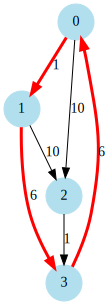

In [5]:
a = Node()
b = Node()
c = Node()
d = Node()


graphs = Graph.createGraph([a, b, c, d], directed=True)

graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(d,a,6)

visualizeGraph(graphs, "graph-cycle")
edges_in_cycle = [(0, 1, 1),(1, 3, 6),(3, 0 , 6)]
displayPath(edges_in_cycle, "graph-cycle")

## Path in a Graph

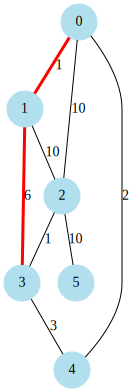

In [6]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)

graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "graph-path")
edges_in_path = [(0, 1, 1), (1, 3, 6)]
displayPath(edges_in_path, "graph-path")

## Connectedness of Graph

**Connected Graphs**: Connected graphs are graphs where a path exists from one node to every other node.

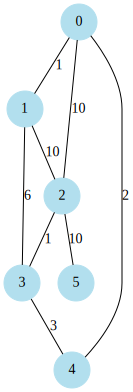

In [7]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)

graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "connected-graph")

**Disconnected Graphs**: You have the sub graphs and the component of a graph! 

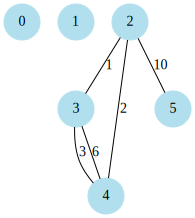

In [8]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


# graphs.add_Edge(a,c,10)
graphs.add_Edge(c,e,2)
# graphs.add_Edge(b,c,10)
graphs.add_Edge(e,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)


visualizeGraph(graphs, "disconnected-graph")

## References

1. Notes from [tutorialspoint.com](https://www.tutorialspoint.com/graph_theory/)